# Logistic Regression

- 回帰アルゴリズムの中には**分類に使えるもの**がある（**逆も然り**）
- **ロジスティック回帰**は，**インスタンスが特定のクラスに属する確率**を推計するためによく用いられる
- 計算結果を直接出力するのではなく，結果のロジスティックを返す

学習対象となるコスト関数はどう定義すれば良いか．下記を満たすように関数を定義すれば良い
- 正解がy = 1の場合，モデルが$\hat{y} = 0$を推測するほどペナルティを与える
- 正解がy = 0の場合，モデルが$\hat{y} = 1$を推測するほどペナルティを与える

そこで，下記を定義する．
- 正解がy = 1の場合，$-log(\hat{y})$（0に近づくほど無限大，１に近づくほど0になる）
- 正解がy = 0の場合，$-log(1-\hat{y})$（上記の逆）

上記の場合，コスト関数を場合分けせねばならないので，１つにまとめる
- $-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat)]$

In [1]:
import os
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

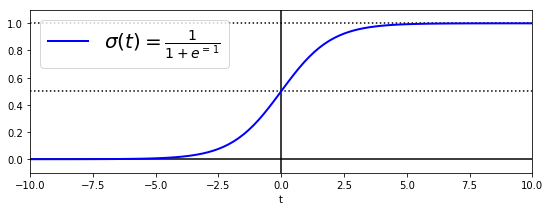

In [6]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-0.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \frac{1}{1+e^{=1}}$')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
X = iris['data'][:, 3:] # petal width
y = (iris['target']==2).astype(np.int) # targertが2のものをTrueで取り出し，intで1に変換

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

petal widthごとのtargetに分類される確率

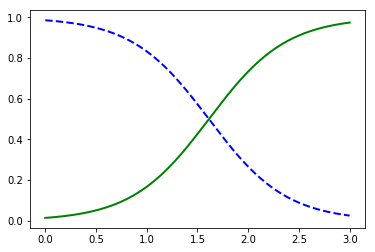

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

## decision boundary

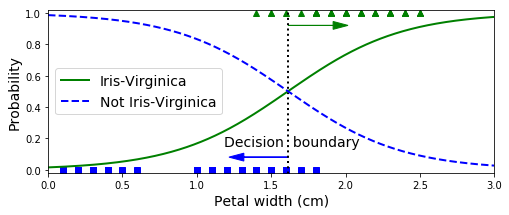

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
# sample data
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

# decision boundary
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# probability line
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

# annotation
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# misc
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

両端は自信をもって分類できそうだが，中間はあまり自信を持てない

In [24]:
decision_boundary

array([1.61561562])

In [25]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

２つの特徴量で見てみよう

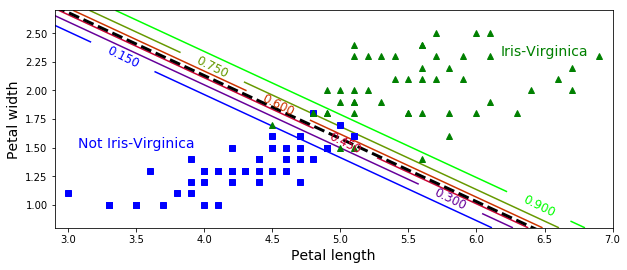

In [76]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = (iris['target']==2).astype(np.int)
# サンプルのプロット
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0],X[y==0, 1], 'bs') # Not Virginica
plt.plot(X[y==1, 0],X[y==1, 1], 'g^') # Virginica

# Cは正則化の強さのinverse（したがって大きいほど正則化が弱くなる（より訓練データに忠実になる））
log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
# log_reg = LogisticRegression(solver='liblinear', C=10, random_state=42)
log_reg.fit(X, y)

# 決定境界を描画するためのデータ
# meshgridの動作は下記セルで実行
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1), # 行データを作成するので，縦方向に200個並べる
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),# 列データを作成するので，横方向に500個並べる
)
X_new = np.c_[x0.ravel(), x1.ravel()]
# ここまでがセット

# LogisticRegressionによる，それぞれのクラスに分類される「確度」の算出
y_proba = log_reg.predict_proba(X_new)

# クラス１（Virginica）に分類される確度を取得
# もう一度座標空間（２次元）に起こす
zz = y_proba[:, 1].reshape(x0.shape) # x0もx1も次元数は同じ
# 輪郭（決定境界）の描画
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# 描画領域での決定境界を描画する
left_right = np.array([2.9, 7]) # 決定境界を描画するデータのx0軸の両端データ
# log_reg.coef_ -> array([[ 5.7528683 , 10.44455633]])
#  w0 * x0 + w1 * x1 + b = 0
#  -> x1 = -(w0 * x0 + b) / w1
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12) # contourにラベルをつける
plt.plot(left_right, boundary, "k--", linewidth=3) # 描画領域での（x0軸）両端の決定境界線
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

ここで，決定境界が直線であることに注目！！！これは，特徴量をw0+w1*x1+w2*x2=0に変換したものに該当する．

そして，この結果をシグモイドによって確度に変換する．したがって，この直線上に乗る特徴量の組み合わせは同じ確度となる．

n次元の場合は，n次元で「線形な決定境界」が引かれる．

# softmax regression

In [77]:
X = iris['data'][:, (2,3)]
y = iris['target']

ソフトマックス回帰の考え方はロジスティック回帰の延長でもある．    
「あるクラスに属する確率」を多クラスにて行う.  
各クラス$k$がそれぞれ訓練によってパラメータ$\theta^{k}$を持っていて，サンプルに対しソフトマックススコア$s_k(x) = (\theta^{(k)})^{T} \cdot x$を求める  
その後，ソフトマックス関数を適用しクラス$k$に属する確率$\hat p_k$を求める．$$\hat p_k = \sigma(s(x)) = \frac{e^{(x-k(x))}}{\sum_{j=1}^K e^{s_j(x)}}$$

multi_classは「ovr:one-versus-rest」か「mutinomial:多クラス分類」か  
LogisticRegressionではデフォルトではovrだが，multinomiaをセットすると「ソフトマックス回帰」が使える

solverについては
[Scikit Documentation]:https://scikit-learn.org/stable/modules/linear_model.html  
（ソフトマックス回帰をサポートするsolverを使う必要がある）  
[Scikit Documentation](https://scikit-learn.org/stable/modules/linear_model.html)  
[logistic regression python solvers' defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)  

In [81]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

/Users/yamaji/study/python/py36/env/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'cmapp'
  s)


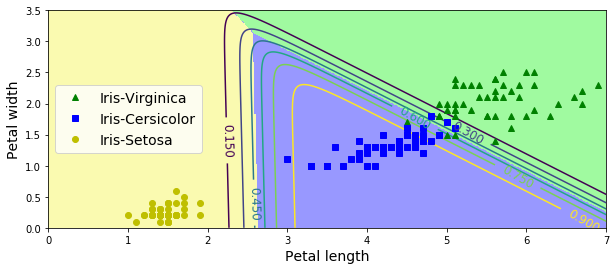

In [99]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Cersicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# draw class color
# contourf is filled countour
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# draw boundary dicision
# level is automaticaly chosen
contour = plt.contour(x0, x1, zz1, cmapp=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

ソフトマックス回帰は多クラス分類が可能だが，「１出力」であることに注意しよう．したがって，１枚の写真に写っている人を複数出力するといったことはできない．

# 交差エントロピーの話

**ターゲットクラスに属する確率を低く見積もった時に，ペナルティを高く与えるコスト関数**  
ターゲットクラスにどれくらい適合するかを測定するために，頻繁に用いられる関数  

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K {y_k}^{(i)}log({\hat p_k}^{(i)})$

/Users/yamaji/study/python/py36/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


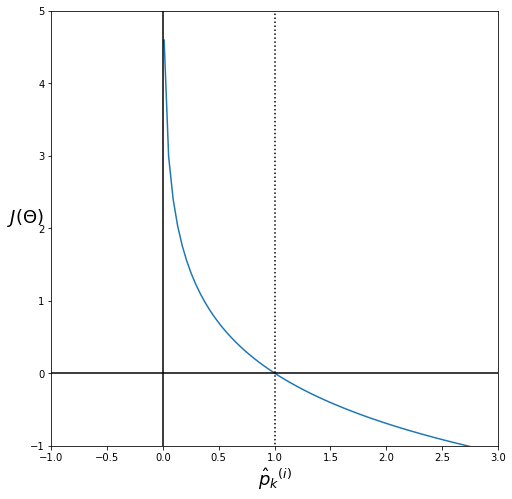

In [117]:
t = np.linspace(-1, 3, 100)
y = -np.log(t)

plt.figure(figsize=(8,8))
plt.plot(t, y)
plt.plot([-1, 3], [0, 0], 'k-')
plt.plot([0, 0], [-2, 5], 'k-')
plt.plot([1, 1], [-2, 5], 'k:')
plt.xlabel(r'${\hat p_k}^{(i)}$', fontsize=18)
plt.ylabel(r'$J(\Theta)$', rotation=0, fontsize=18)
plt.axis([-1, 3, -1, 5])
plt.show()

$i$番目のインスタンスのターゲットクラスが$k$なら，${y_k}^{(i)}$は１，そうでなければ０になる  
（ちなみに２クラス（K=2）の場合は，ロジスティック関数のコスト関数と同じになる)

${y_k}^{(i)}$が１の場合（分類したいものの場合）で${\hat p_k}^{(i)}$が1に予測するとコストは0に近く，0に予測すると無限大になる．  
${y_k}^{(i)}$が0の場合（分類しないものの場合）はコストに関してはあまり興味を持たないことに注意．  
https://qiita.com/celaeno42/items/7efdbb1491406f4bde96 がわかりやすい

## meshgridの動作

In [64]:
x0, x1 = np.meshgrid(
    np.linspace(0, 2, 3).reshape(-1, 1), # 指定データについて200×500のデータを作る
    np.linspace(3, 7, 5).reshape(-1, 1),# 指定データについて200×500のデータを作る
)

In [65]:
x0

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [66]:
x1

array([[3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.]])

同じ次元の配列が作成され，それぞれの位置が同じ要素に対応しているので，

ravelを使って横に並べれば，行方向にサンプルをもつ配列が出来上がる

In [68]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [69]:
X_new

array([[0., 3.],
       [1., 3.],
       [2., 3.],
       [0., 4.],
       [1., 4.],
       [2., 4.],
       [0., 5.],
       [1., 5.],
       [2., 5.],
       [0., 6.],
       [1., 6.],
       [2., 6.],
       [0., 7.],
       [1., 7.],
       [2., 7.]])